In [1]:
import dhlab as dh
import pandas as pd

In [2]:
corpus = dh.Corpus(doctype="digibok", ddk="641*", lang="nob", limit=5000)

In [117]:
corpus.frame.to_excel("corpus.xlsx")

In [106]:
corpus_0 = dh.Corpus(doctype="digibok", ddk="0*", lang="nob", limit=50000)
corpus_1 = dh.Corpus(doctype="digibok", ddk="1*", lang="nob", limit=50000)
corpus_2 = dh.Corpus(doctype="digibok", ddk="2*", lang="nob", limit=50000)
corpus_3 = dh.Corpus(doctype="digibok", ddk="3*", lang="nob", limit=50000)
corpus_4 = dh.Corpus(doctype="digibok", ddk="4*", lang="nob", limit=50000)
corpus_5 = dh.Corpus(doctype="digibok", ddk="5*", lang="nob", limit=50000)
corpus_6 = dh.Corpus(doctype="digibok", ddk="6*", lang="nob", limit=50000)
corpus_7 = dh.Corpus(doctype="digibok", ddk="7*", lang="nob", limit=50000)
corpus_8 = dh.Corpus(doctype="digibok", ddk="8*", lang="nob", limit=50000)
corpus_9 = dh.Corpus(doctype="digibok", ddk="9*", lang="nob", limit=50000)

In [156]:
sample_total_ref = dh.Corpus(doctype="digibok", from_year=1950, to_year=2024, lang="nob", limit=50000)

In [125]:
total_ref = pd.concat([corpus_0.frame, corpus_1.frame, corpus_2.frame, corpus_3.frame, corpus_4.frame, corpus_5.frame, corpus_6.frame, corpus_7.frame, corpus_8.frame, corpus_9.frame])

In [126]:
total_ref_corpus = dh.Corpus().from_df(total_ref)

In [3]:
ref_corpus = dh.Corpus(doctype="digibok", lang="nob", from_year=1950, to_year=2024, limit=5000)

In [118]:
ref_corpus.frame.to_excel("ref_corpus.xlsx")

In [180]:
from collections import Counter
def score_words(corpus, ref_corpus, head=10, relecance_cut=10):
    local_words = Counter(dh.nbtokenizer.tokenize(' '.join(list(corpus.frame.title)).lower()))
    ref_words = Counter(dh.nbtokenizer.tokenize(' '.join(list(ref_corpus.frame.title)).lower()))
    local_words_frame = pd.DataFrame(local_words.items(), columns=["word", "freq"]).set_index("word")
    ref_words_frame = pd.DataFrame(ref_words.items(), columns=["word", "freq"]).set_index("word")
    local_words_frame["relfreq"] = local_words_frame["freq"] / local_words_frame.freq.sum()
    ref_words_frame["relfreq"] = ref_words_frame["freq"] / ref_words_frame.freq.sum()
    merged_frame = pd.merge(local_words_frame, ref_words_frame, left_index=True, right_index=True)
    merged_frame["relevance"] = merged_frame.relfreq_x / merged_frame.relfreq_y
    sorted_merged_frame = merged_frame.sort_values(by=["relevance"], ascending=False)
    keyness = sorted_merged_frame[sorted_merged_frame.relevance > relecance_cut].sort_values(by="freq_x", ascending=False).head(head)
    return (local_words_frame, ref_words_frame, keyness)

# sentiment analysis
import sentiment
def score_sentiment(local_words_frame):
    pos, neg = sentiment.load_norsentlex()
    merged_frame_2 = local_words_frame.reset_index()
    merged_frame_2["pos"] = merged_frame_2.apply(lambda x: x.relfreq if x.word in list(pos.terms) else 0, axis=1)
    merged_frame_2["neg"] = merged_frame_2.apply(lambda x: x.relfreq if x.word in list(neg.terms) else 0, axis=1)
    print(merged_frame_2["pos"].sum() * 100) 
    print(merged_frame_2["neg"].sum() * 100) 

In [198]:
local_words_frame, ref_words_frame, keyness = score_words(corpus_8, sample_total_ref, relecance_cut=10)

In [199]:
score_sentiment(local_words_frame)

5.2445173683368
6.923323195133664


In [ ]:
import wordcloud
import matplotlib.pyplot as plt

In [ ]:
keyness.to_excel('keyness.xlsx')

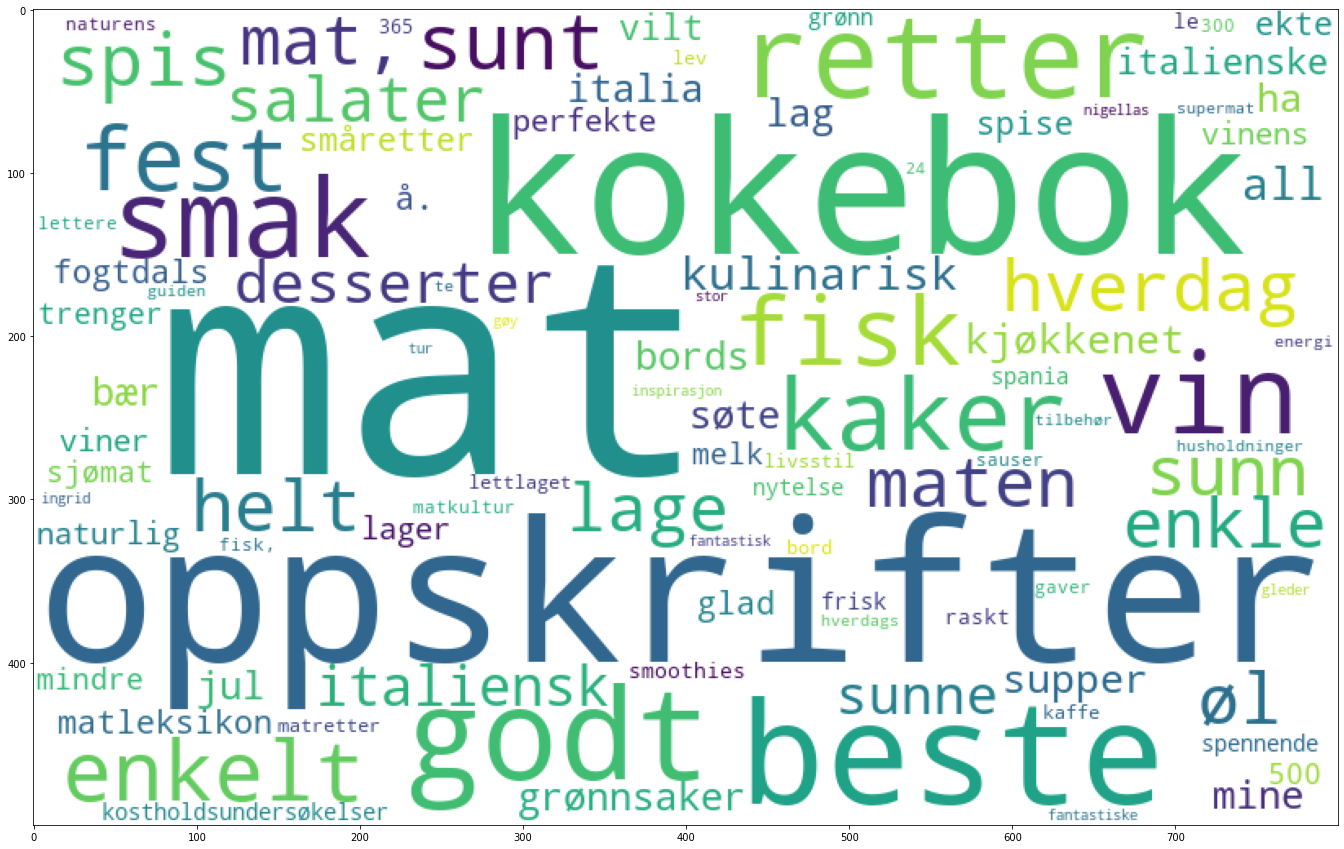

In [ ]:
# lag ordsky
wc = wordcloud.WordCloud(background_color="white", prefer_horizontal=True, width=800, height=500)
wc.generate_from_frequencies(keyness.freq_x.to_dict())
plt.figure(figsize=(30,15))
plt.imshow(wc)
plt.savefig('cloud.png')